In [146]:
#import NumPy and Pandas libraries
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

#### Import Leads Dataset

In [147]:
leads = pd.read_csv("Leads.csv")

In [148]:
#check few rows
leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [149]:
#check shape of dataset
leads.shape

(9240, 37)

In [150]:
#check summary of dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [151]:
#check info of dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

It can be seen that there are categorical variables present in this dataset for which dummy variables needs to be created. Also, there are a lot of null values present, so will have to handle them.

### Step 1: Data Cleaning & Preparation

+ There are a lot of 'Select' values present in many columns of categorical variables.
+ It may be because the customer did not select any option from the list, hence it shows 'Select'.
+ 'Select' values are as good as NULL. So converting them to null values.

Visualing few columns to demonstrate plot of 'Select' values (for ppt point of view).

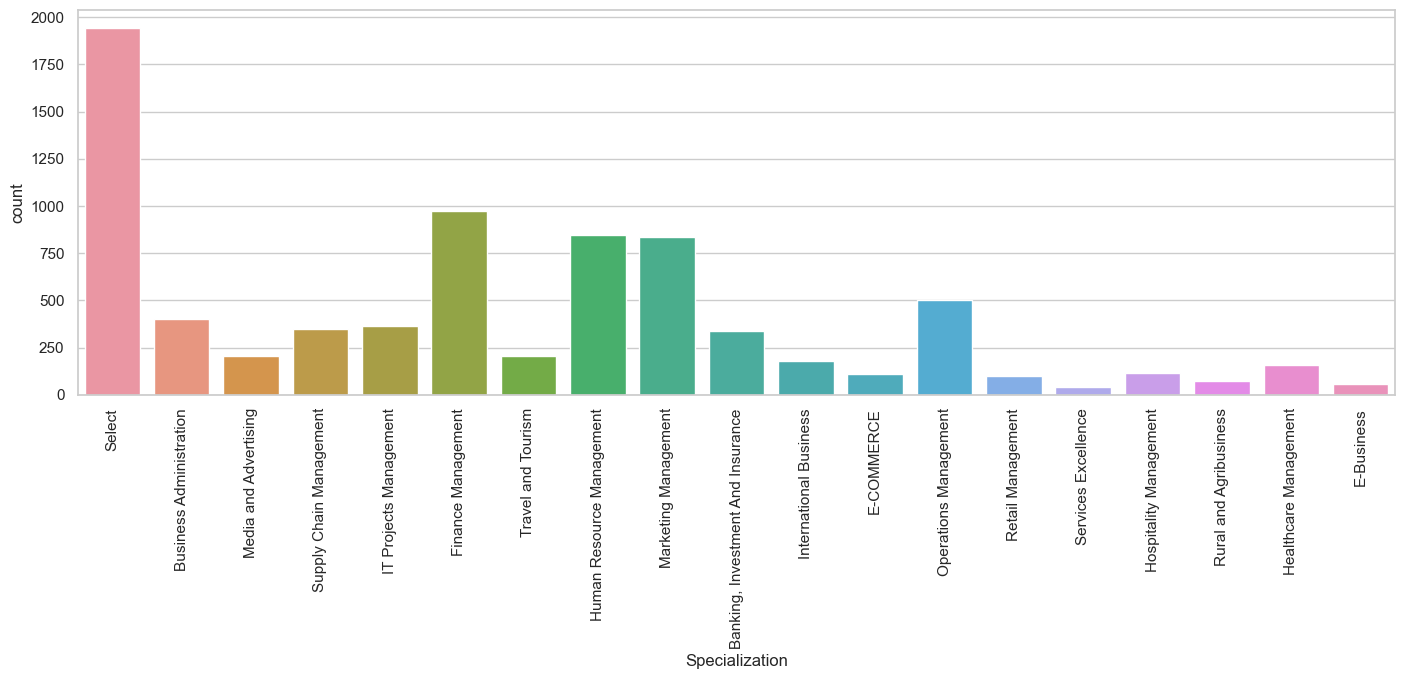

In [152]:
#create a countplot function to visualise featues - this will be reused again
def countplot(x, fig):
    sns.countplot(data=leads, x=x)
    if(fig == 3):
        plt.xticks(rotation = 45)
    else:
        plt.xticks(rotation = 90)

plt.figure(figsize=(17,5))
countplot('Specialization',1)

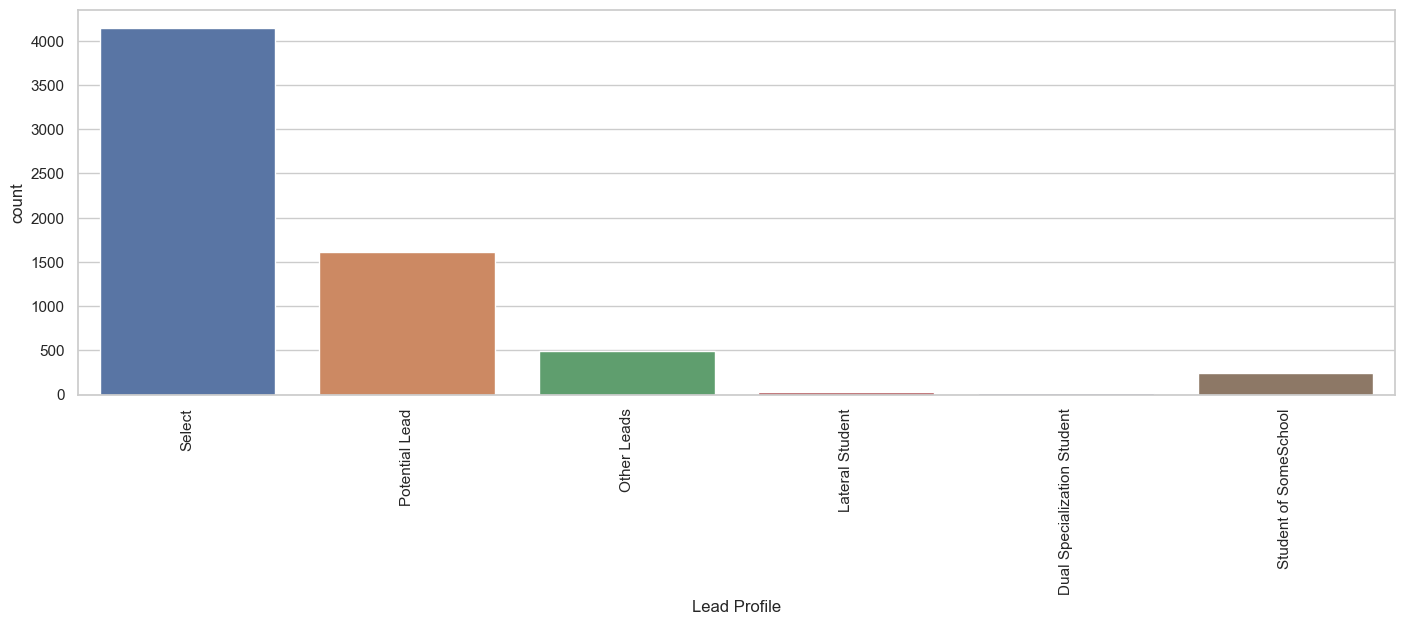

In [153]:
plt.figure(figsize=(17,5))
countplot('Lead Profile',2)

In [154]:
#convert 'Select' values to null.
leads = leads.replace('Select', np.nan)

In [155]:
#check total missing values in each column
leads.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [156]:
#checking the percentage of missing values in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are a lot of columns with high missing values. Since, there are 9000 datapoints in the dataset, eliminating columns having greater than 4000 missing values.

In [157]:
for missing in leads.columns:
    if leads[missing].isnull().sum()>4000:
        leads.drop(missing, axis=1,inplace=True)

In [158]:
#checking the percentage of missing values in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Visualing features via countplot

#### 1. Column: Specialization
Has 37% missing values

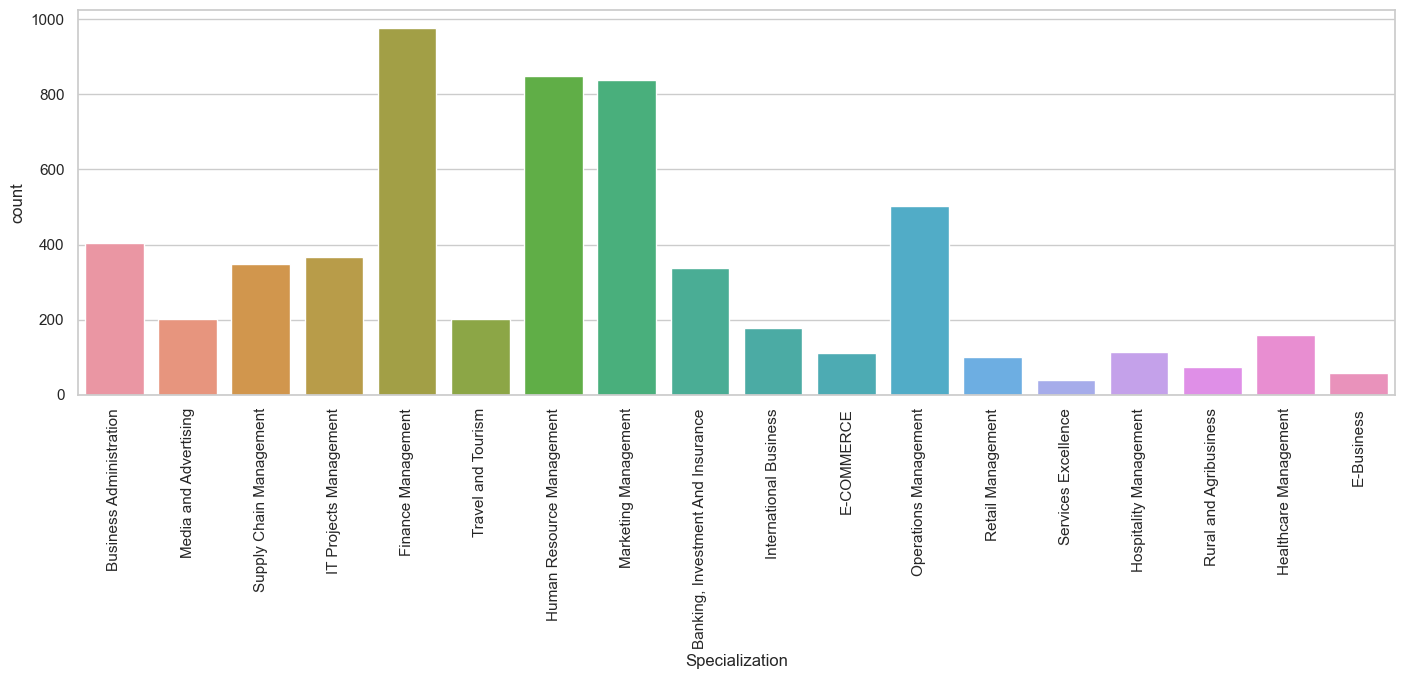

In [159]:
plt.figure(figsize=(17,5))
countplot('Specialization',1)


+ There is 37% missing values present in the Specialization column. The reason may be a student already opted for a specialization or the option for specialization is not there. 
+ So, creating another category 'Others'.

In [160]:
#creating separate category called 'Others'
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

#### 2. Column - Tags
Has 36% missing values.

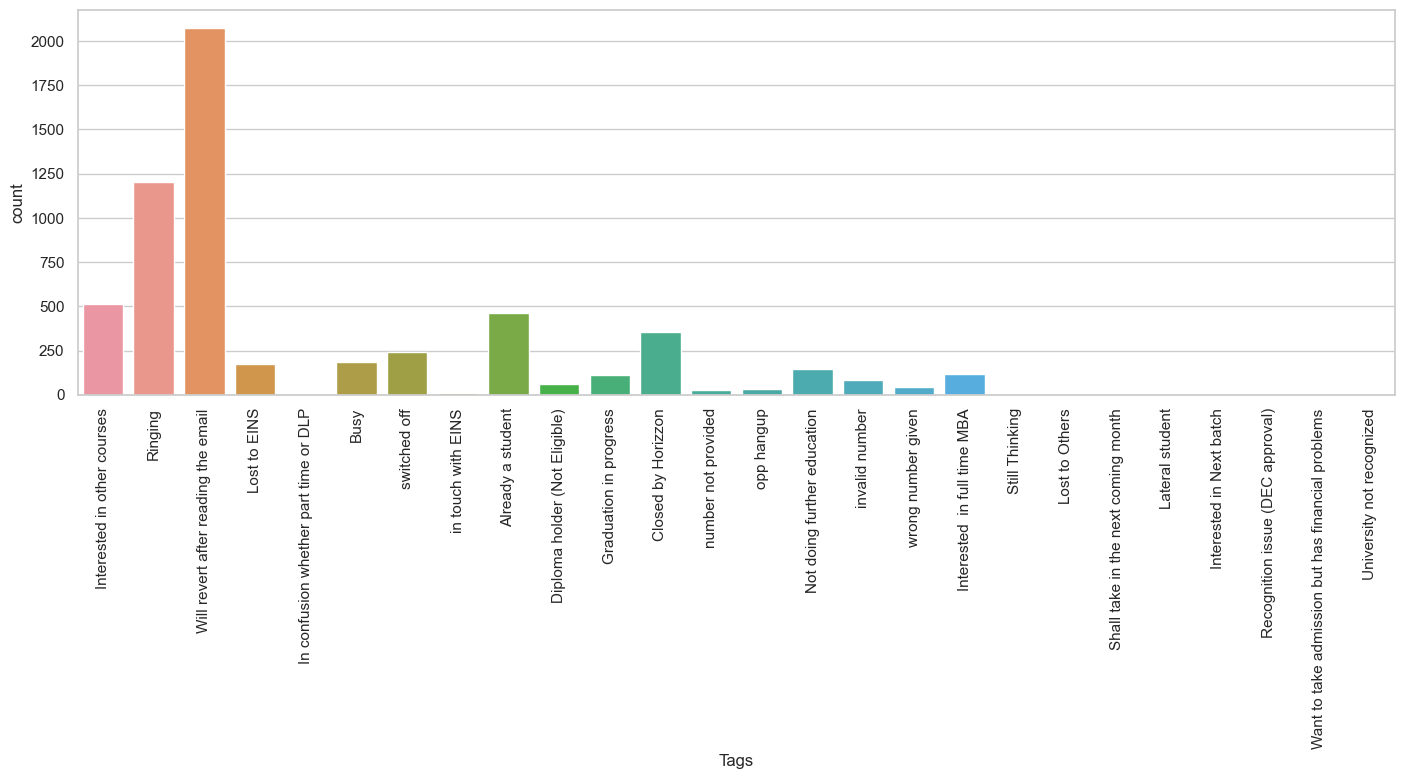

In [161]:
plt.figure(figsize=(17,5))
countplot('Tags',2)

The most frequent value in 'Tags' column is 'Will revert after reading the email', so imputing missing values with it.

In [162]:
#imputing missing data in the tags column with 'Will revert after reading the email'
leads['Tags']=leads['Tags'].replace(np.nan,'Will revert after reading the email')

#### 3. Column: 'What matters most to you in choosing a course'
Has 29% missing value.

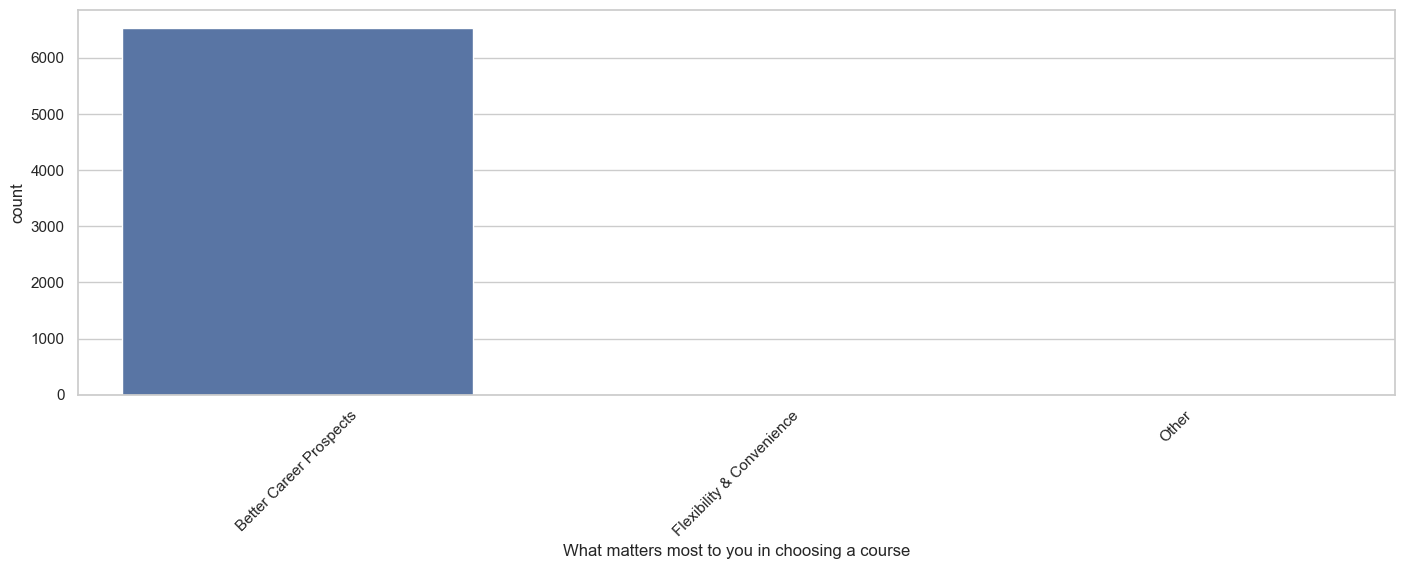

In [163]:
plt.figure(figsize=(17,5))
countplot('What matters most to you in choosing a course',3)

Since, Better Career Prospects covers up 100% column, this is highly skewed so dropping this column.

In [164]:
#dropping this columns
leads=leads.drop('What matters most to you in choosing a course',axis=1)

#### 4. Column: 'What is your current occupation'
Has 29% missing values.

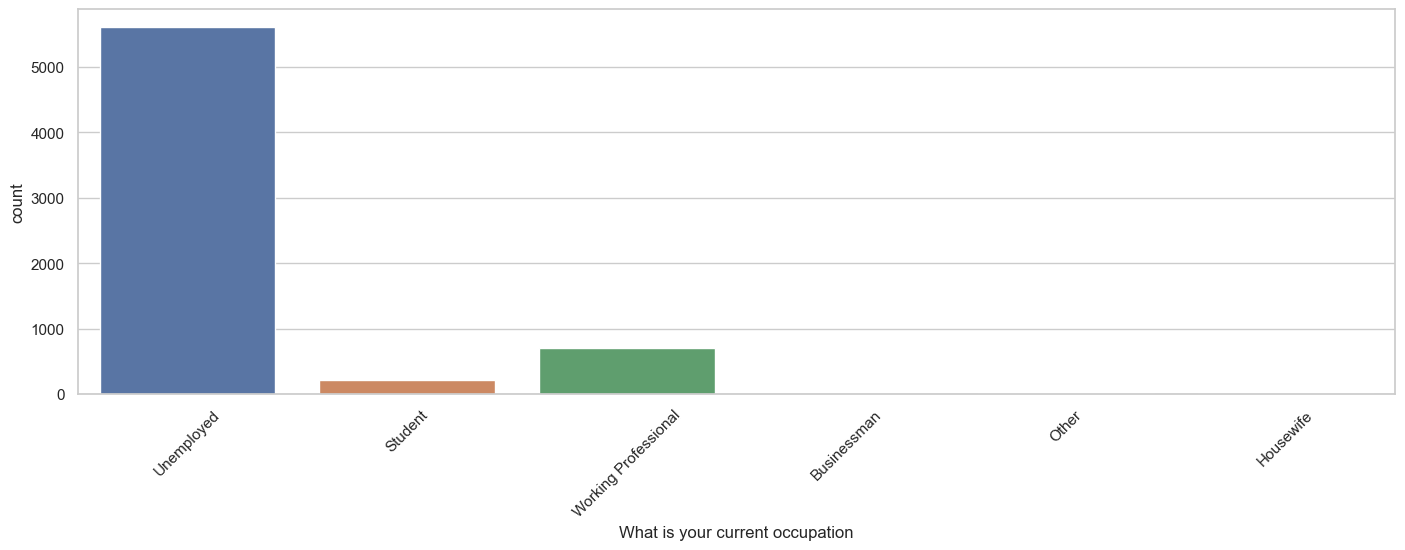

In [165]:
plt.figure(figsize=(17,5))
countplot('What is your current occupation',3)

In [166]:
#finding the percentage of the different categories for this column:
round(leads['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

'Unemployed' is the most repeated value so imputing missing values with it.

In [167]:
#imputing the missing value in the 'What is your current occupation' column with 'Unemployed'
leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan,'Unemployed')

#### 5,6. Column: Country, City
Country has 27% and City has 40% missing values.

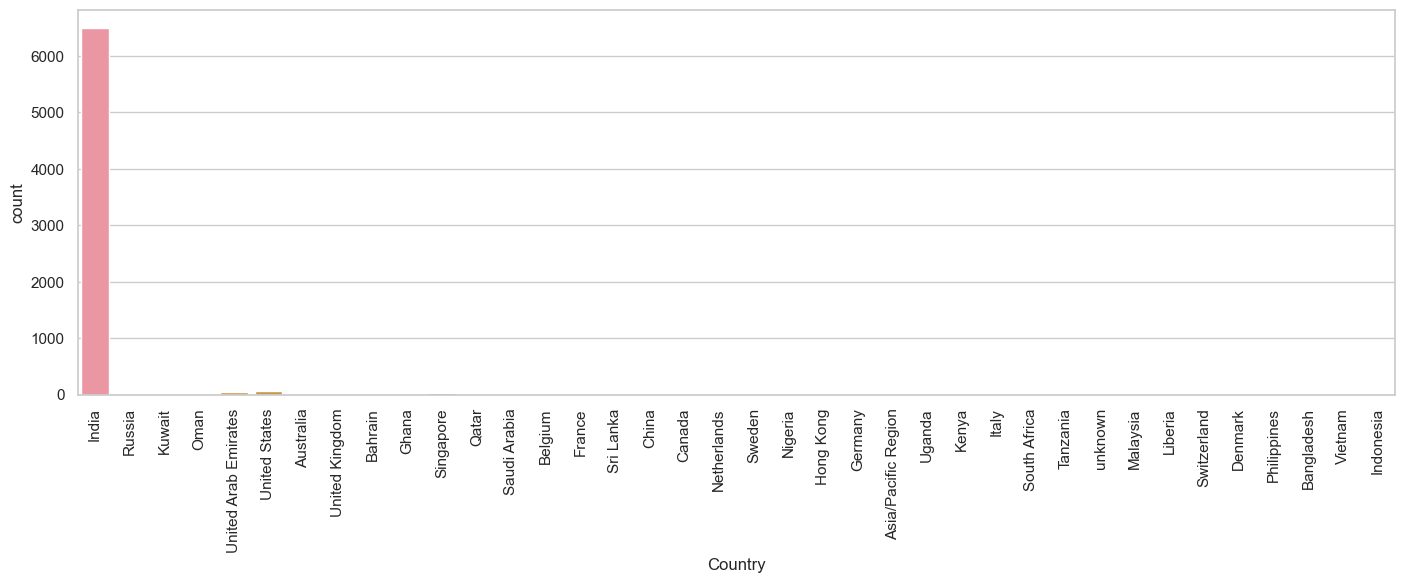

In [168]:
plt.figure(figsize=(17,5))
countplot('Country',5)

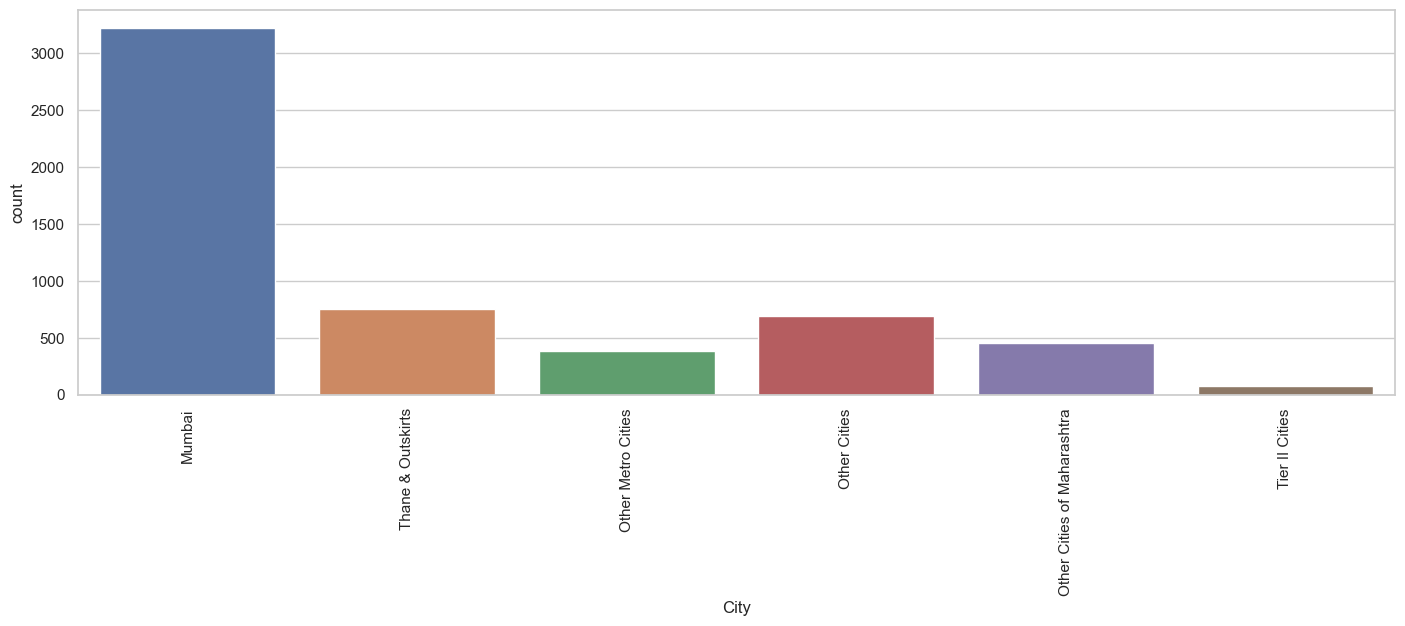

In [169]:
plt.figure(figsize=(17,5))
countplot('City',6)

+ Most values in Country and City column are India and Mumbai, so it is highly skewed. 
+ Either we impute it with the most frequent value or remove as this column will not be used anyway.

In [170]:
#dropping the "City" and "Country" feature
leads.drop(['City','Country'], axis = 1, inplace = True)

Remaining missing values are under 2% so dropping these rows.


In [171]:
#dropping the rows with null values
leads.dropna(inplace = True)

In [172]:
#finding null percentages across columns after removing the above columns
round(leads.isnull().sum()/len(leads.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [173]:
#percentage of rows retained and hence now we don't have any missing values.
(len(leads.index)/9240)*100

98.2034632034632

Also,retention rate is 98% after cleaning the data.


### Performing EDA(Exploratory Data Analysis)

In [174]:
#for safety, checking for duplicates
leads[leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicates.

a. Converted column: The target variable which indicates whether a lead has been successfully converted "1" or not converted"0".

In [175]:
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is around 38%.

b. Lead Origin

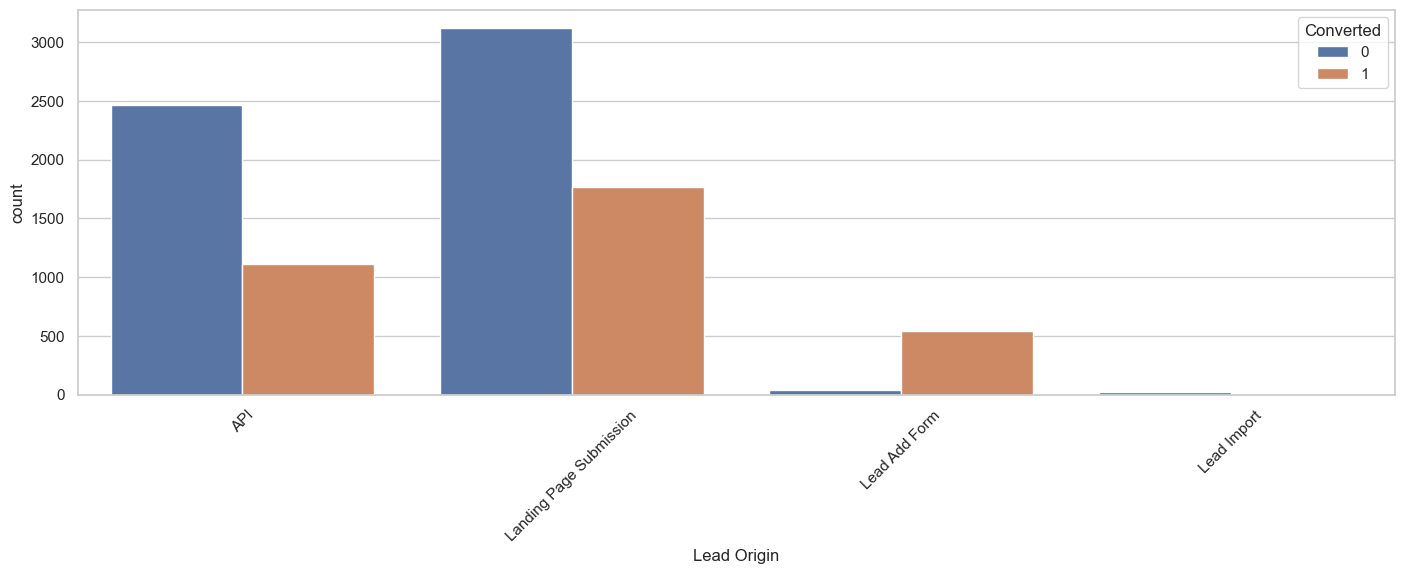

In [176]:
#create another function for countplot with hue="Converted"

def huecountplot(x, fig):
    sns.countplot(x = x, hue = "Converted", data = leads)
    if(fig == 3):
        plt.xticks(rotation = 45)
    else:
        plt.xticks(rotation = 90)

plt.figure(figsize=(17,5))
huecountplot("Lead Origin", 3)

1. API and Landing Page Submission have around 30-35% conversion rate and their leads count are good.
2. Lead Add Form has > 90% conversion rate but leads count is not so high.
3. Lead Import is negligible in both leads and leads converted.

Hence, to improve overall lead conversion rate, focus more on improving lead converion of API and Landing Page Submission origin, and to generate more leads from Lead Add Form.

c. Lead Source

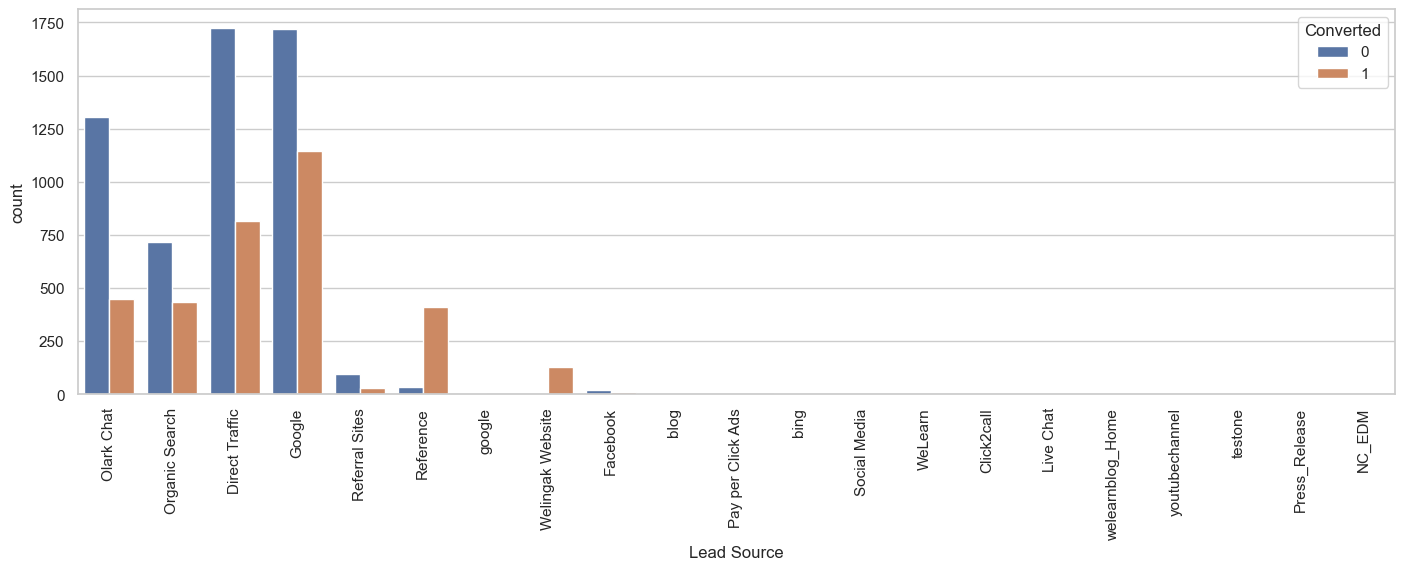

In [177]:
plt.figure(figsize=(17,5))
huecountplot("Lead Source", 1)

In [178]:
#replacing 'google' with 'Google' as they are the same.
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

#creating a new category 'Others' for negligible values.
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

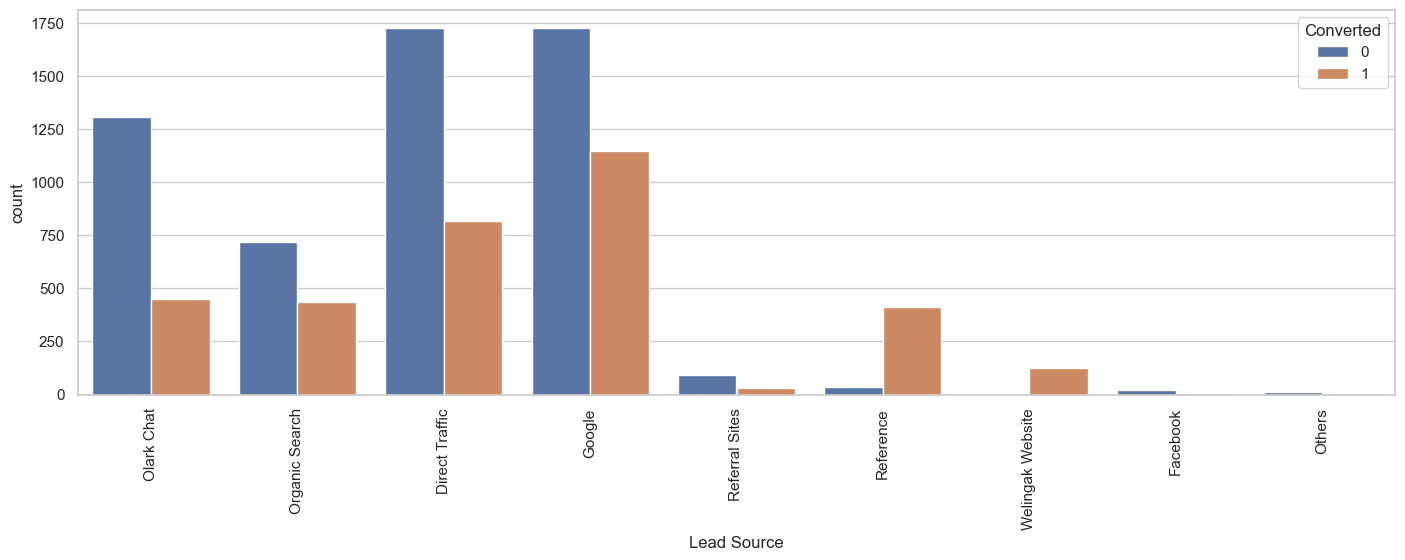

In [179]:
#plotting again
plt.figure(figsize=(17,5))
huecountplot("Lead Source", 1)

1. Google and Direct traffic have generated maximum leads.
2. Leads conversion rate of Welingak Website is high.

Hence, to improve overall more leads have to be generated from reference and Welingak Website. And improve lead conversion rate of Olark Chart, Organic Search, Direct Traffic, and Google leads.

d. Do Not Email

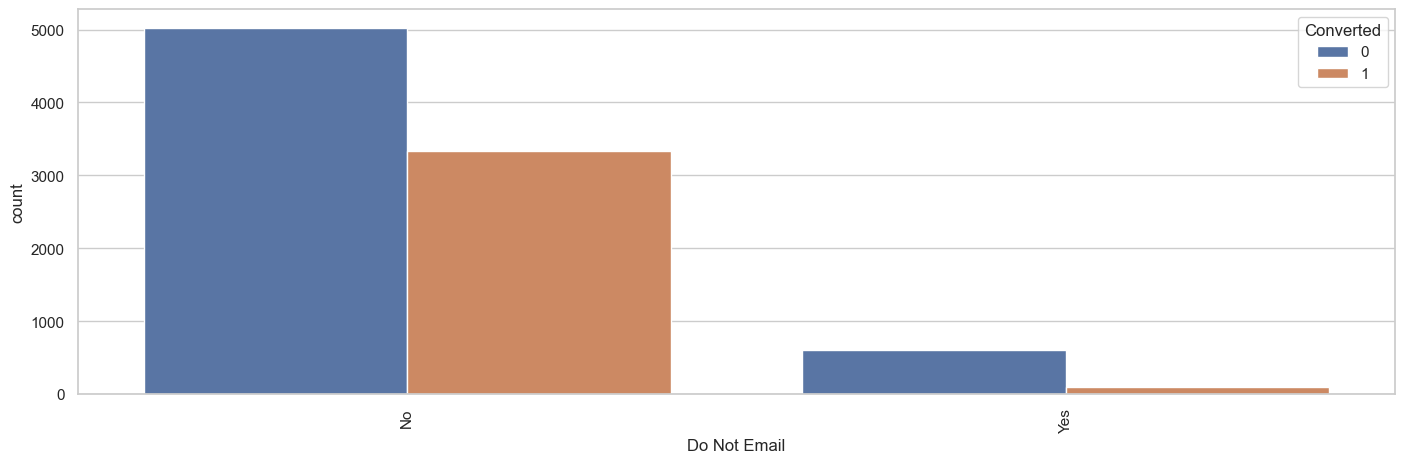

In [180]:
plt.figure(figsize=(17,5))
huecountplot("Do Not Email", 1)


e. Do Not Call

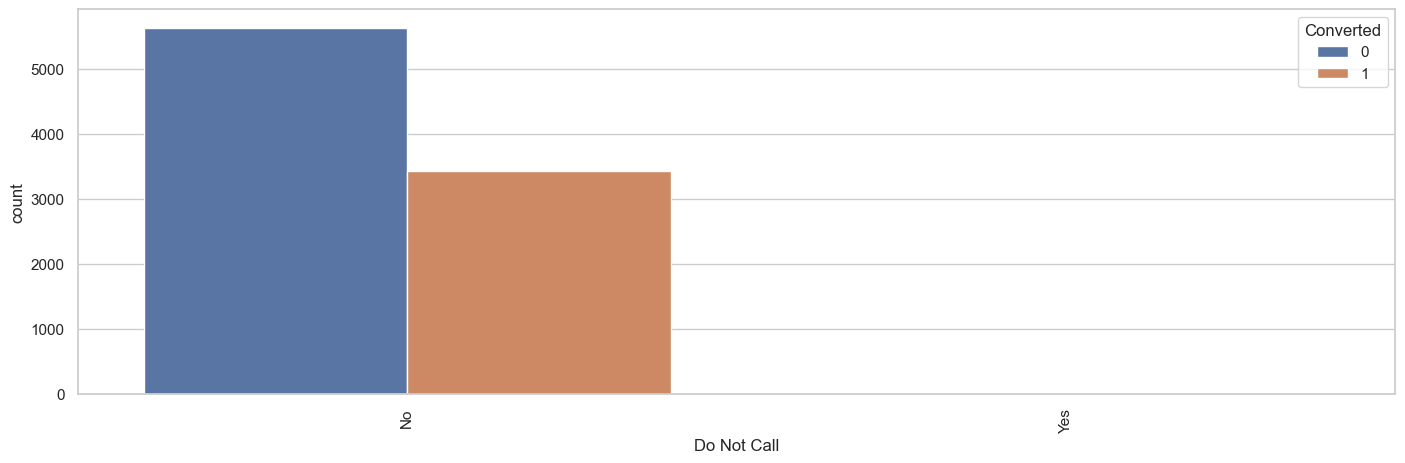

In [181]:
plt.figure(figsize=(17,5))
huecountplot("Do Not Call", 2)

For both "Do Not Email" and "Do Not Call" almost all are 'No'.

f. TotalVisits

In [182]:
leads['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

As seen since mean value is 3 and max is 250, hence there is no consistency. So, detailing percentile to catch the range and visualise that specific portion.

In [183]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .70, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
70%         4.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

Restricting outlier values to a 95% threshold for analysis.

In [184]:
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='Converted', ylabel='TotalVisits'>

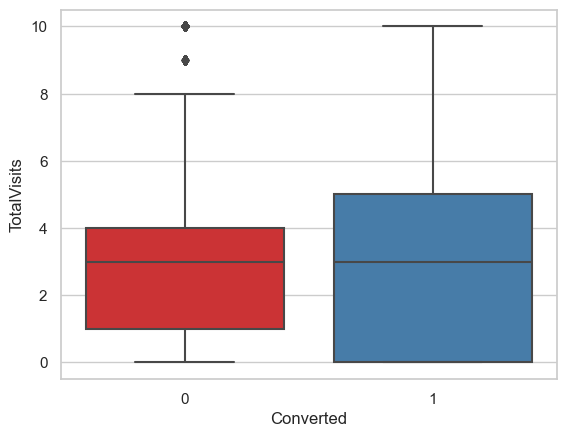

In [185]:
#visualising via boxplot to confirm there no outliers
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads,palette='Set1')

Both converted and non-converted leads have same median. No specific inference can be concluded.

g. Total Time Spent on Website

In [186]:
leads['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

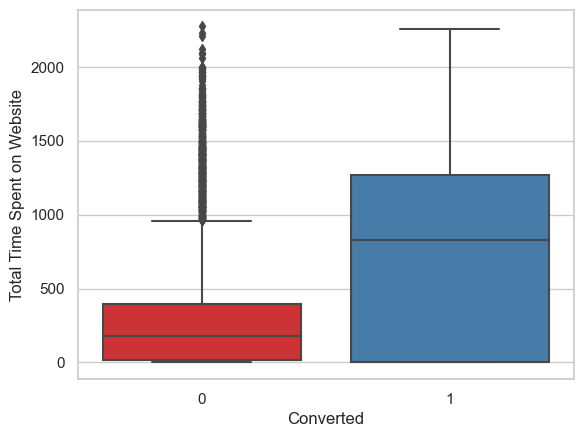

In [187]:
#visualising via boxplot with converted feature
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads,palette='Set1')

Spending more time on website are more likely to be converted successfully.

h. Page Views Per Visit

In [188]:
leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

Restricting outlier values to a 95% threshold for analysis.

In [189]:
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

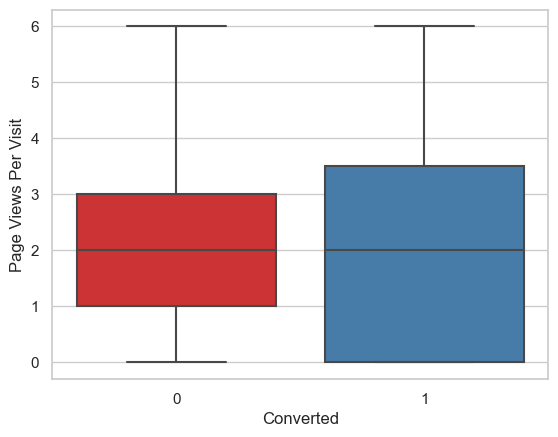

In [190]:
#visualing with converted feature.
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =leads,palette='Set1')

Median for both converted and non-converted leads is the same. No specific inference form this as well.

i. Last Activity

In [191]:
leads['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

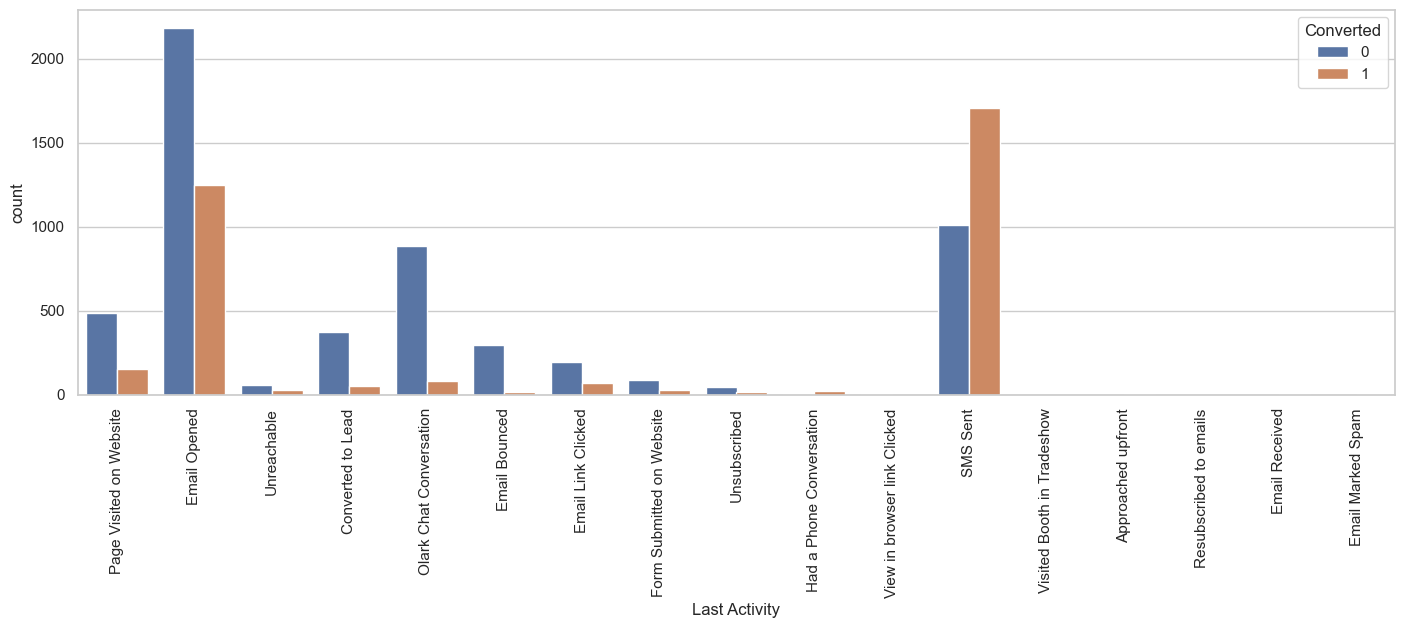

In [192]:
#visualising via countplot
plt.figure(figsize=(17,5))
huecountplot("Last Activity",1)


In [193]:
#creating a new category 'Other_Activity' for negligible values.
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')


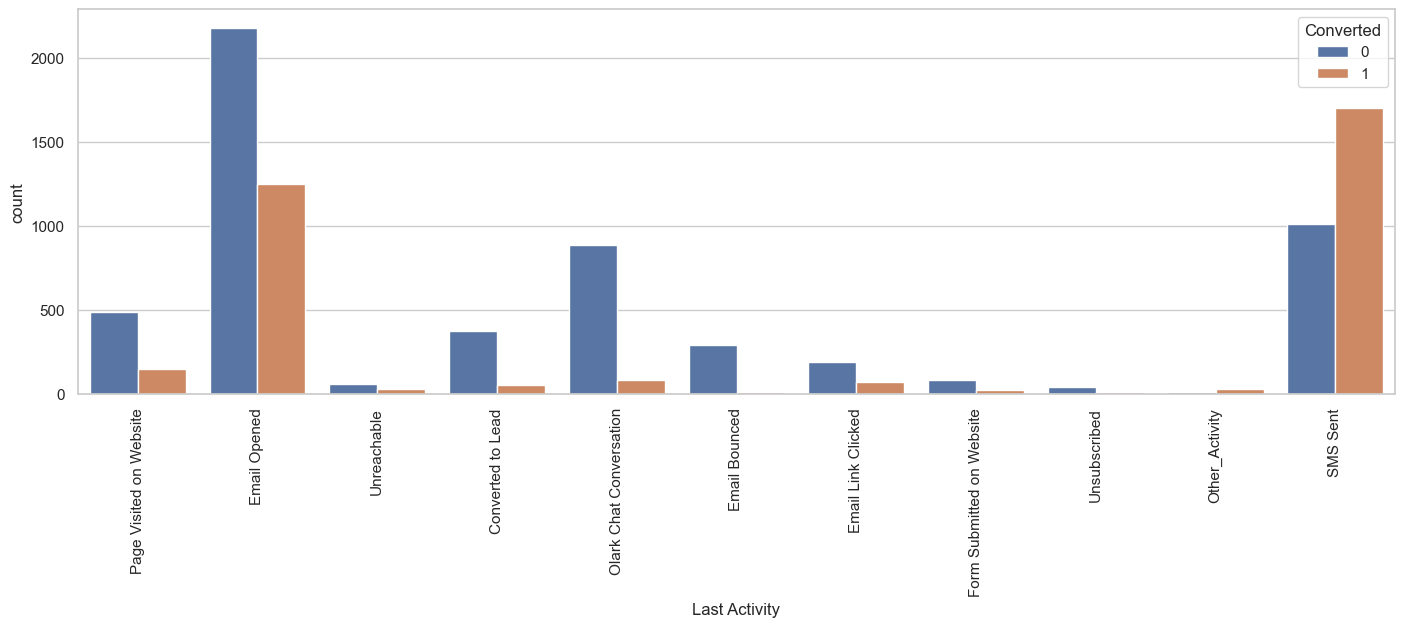

In [194]:
#visualising via countplot again
plt.figure(figsize=(17,5))
huecountplot("Last Activity",1)

1. Most leads have their Email opened as last activity.
2. Leads conversion rate with last activity as SMS Sent is almost 60%.

j. Specialization

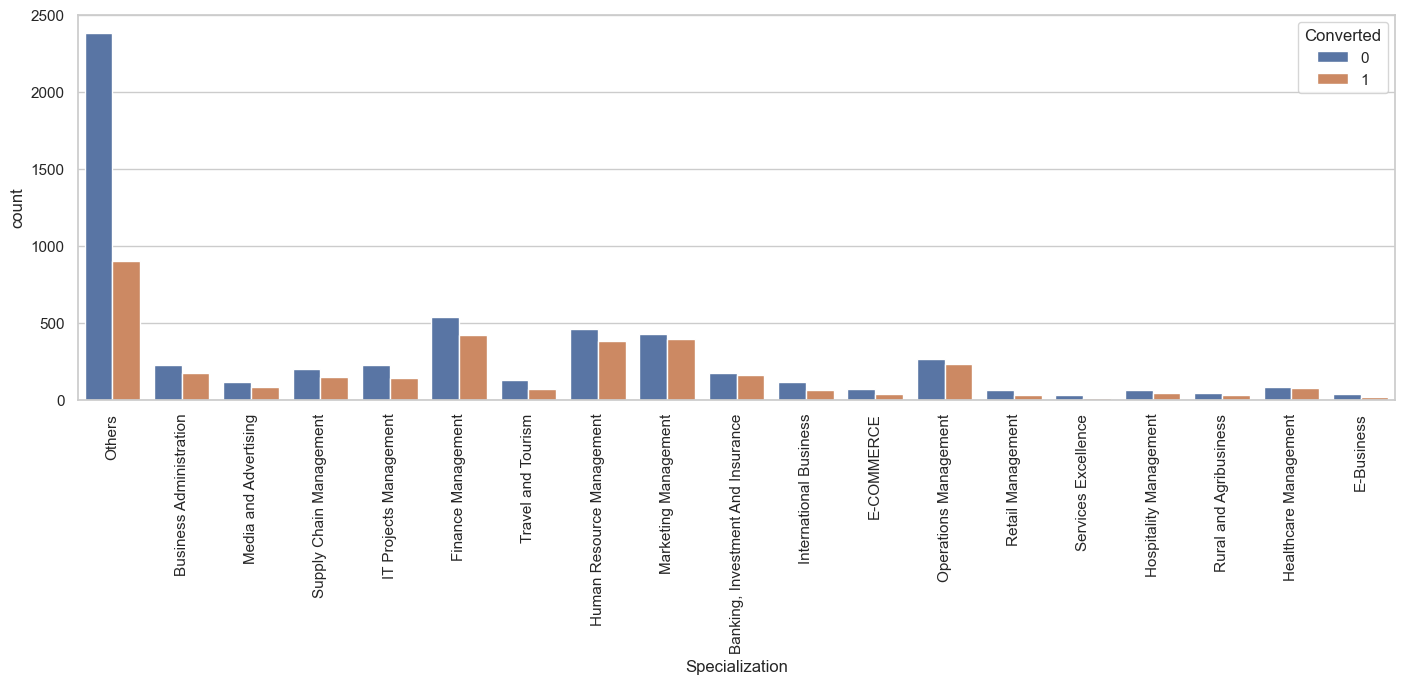

In [195]:
#visualising via countplot
plt.figure(figsize=(17,5))
huecountplot("Specialization",1)

Focus on Specialization where the possibility of conversion rate is high.

k. What is your current occupation

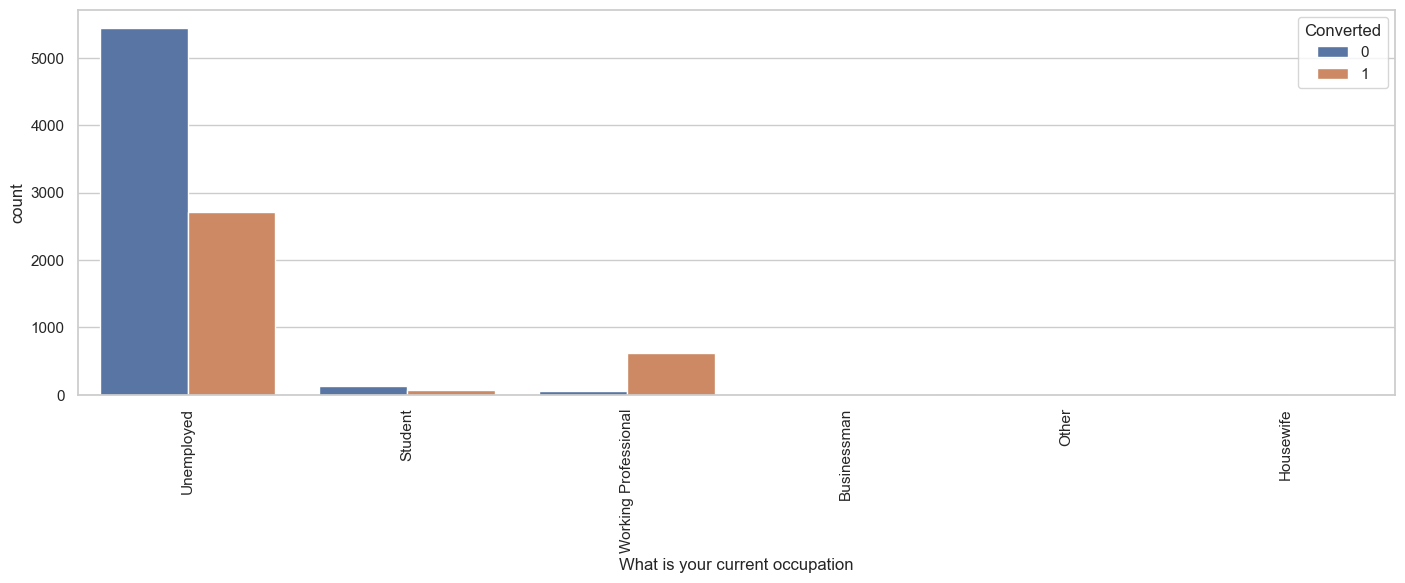

In [196]:
#visualising via countplot
plt.figure(figsize=(17,5))
huecountplot("What is your current occupation",1)

1. Unemployed leads are highest but have around 35% conversion rate.
2. Working Professional going for the course are more likely to opt for the course.

So, focus on increasing leads for Working professional and help convert unemployed leads using apt strategy.

l. Search, Magazine,Newspaper Article,X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses

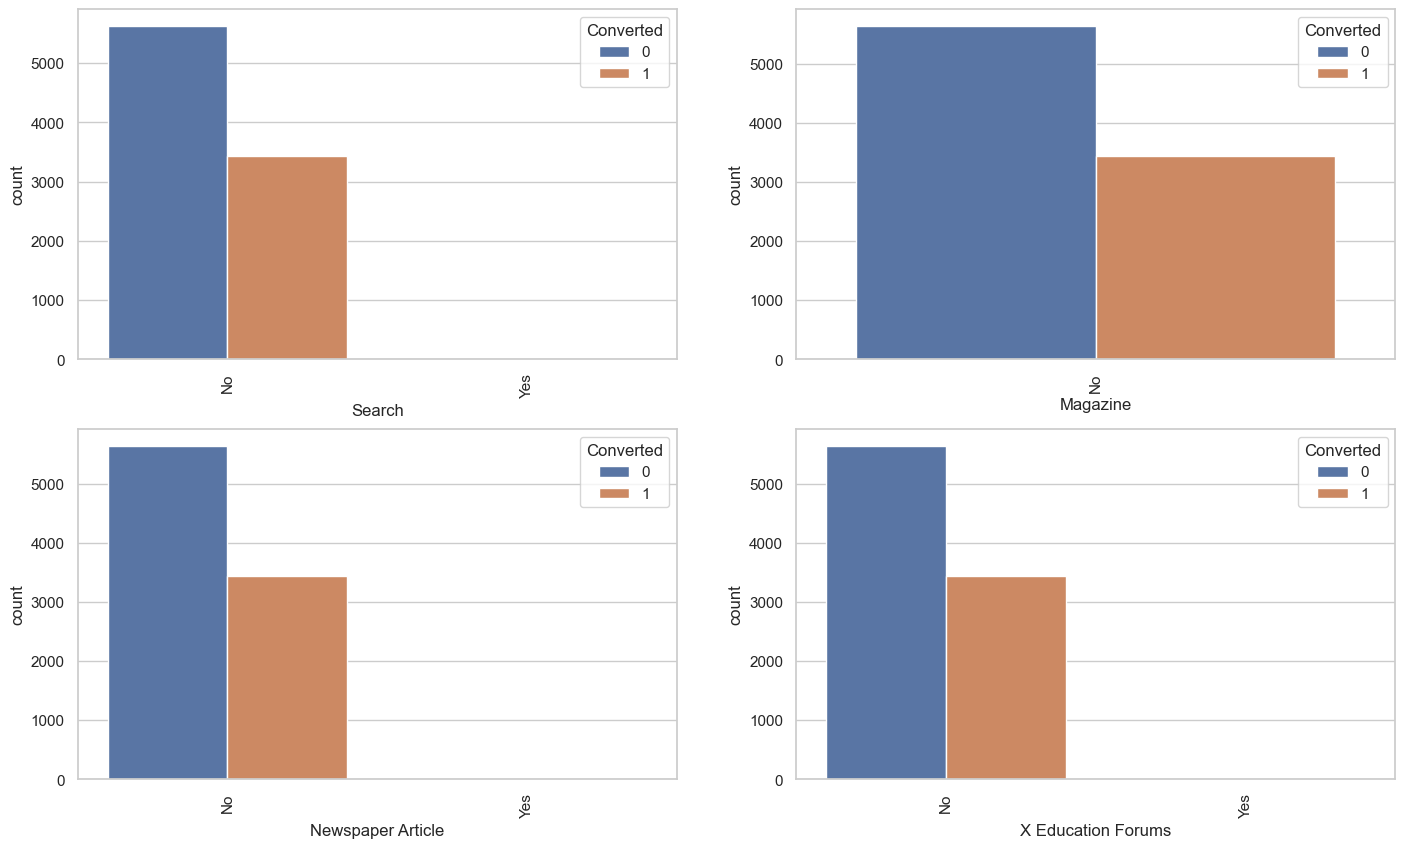

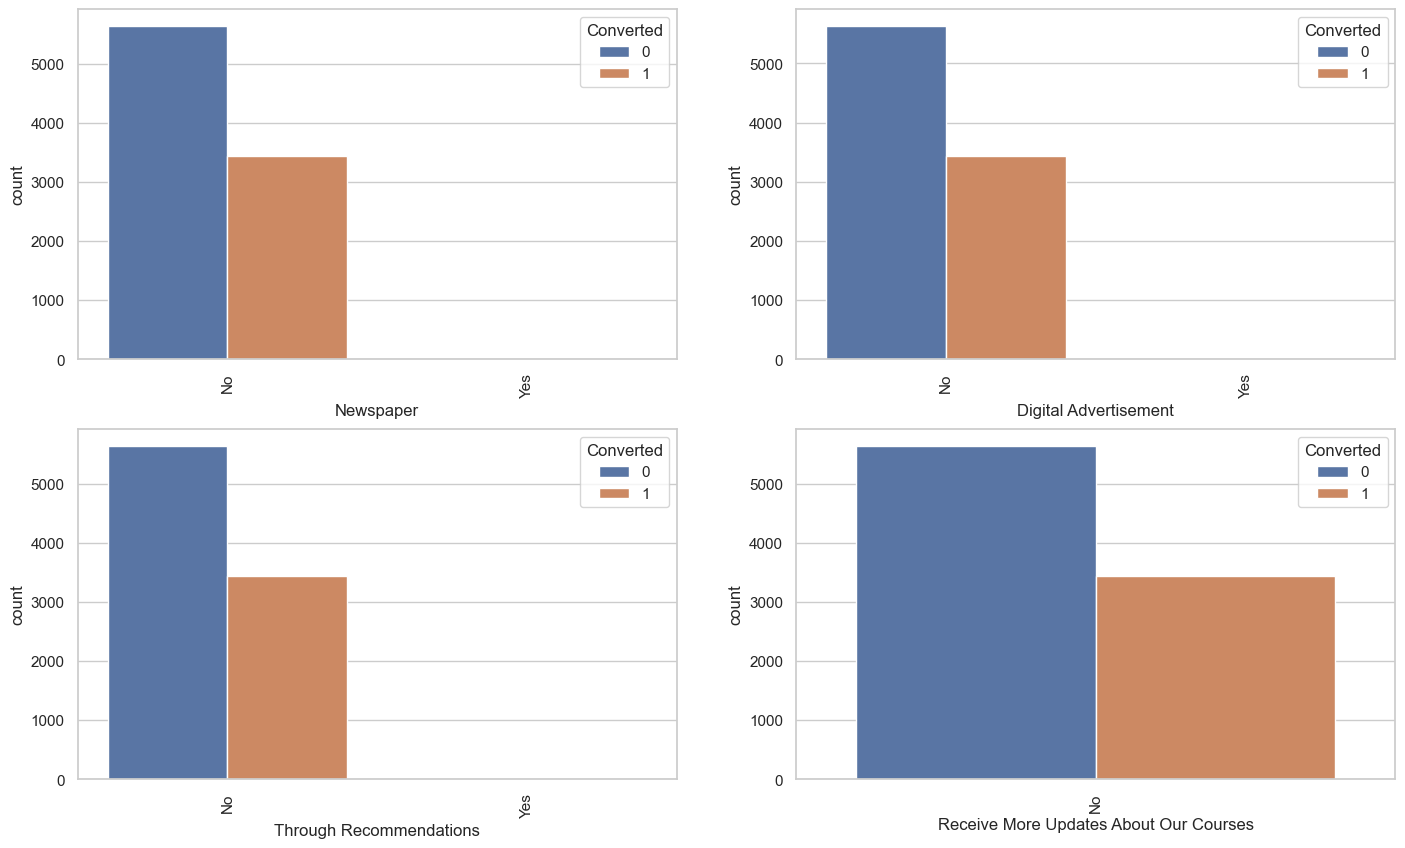

In [197]:
#creating a function for countplot as previous but adding a subplot component here
def huesubplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(x = x, hue = "Converted", data = leads)
    plt.xticks(rotation = 90)

#visualising here
plt.figure(figsize=(17,10))
huesubplot("Search",1)
huesubplot("Magazine",2)
huesubplot("Newspaper Article",3)
huesubplot("X Education Forums",4)

plt.figure(figsize=(17,10))
huesubplot("Newspaper",1)
huesubplot("Digital Advertisement",2)
huesubplot("Through Recommendations",3)
huesubplot("Receive More Updates About Our Courses",4)

Most entries are "No". Hence, no specific inference can be concluded.

m. Tags

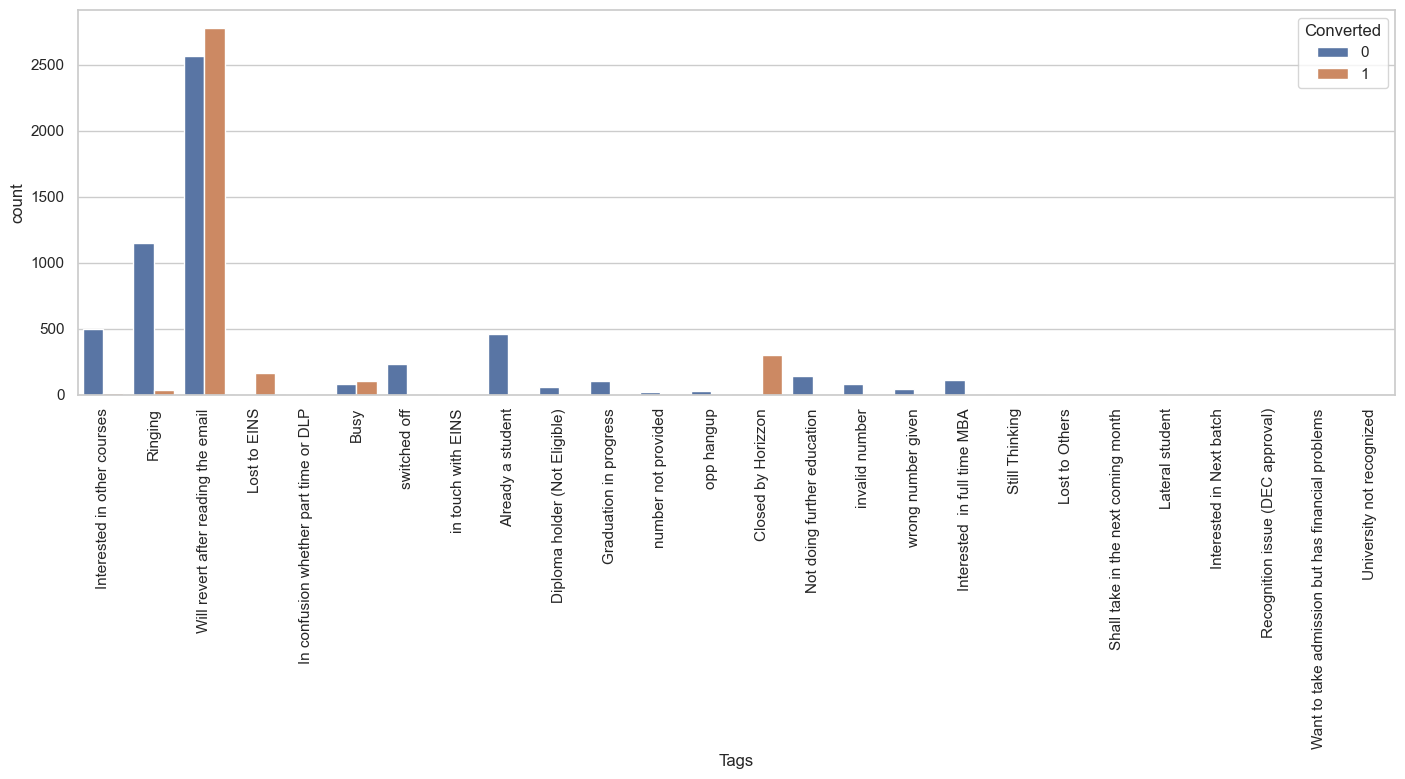

In [198]:
#visualising via countplot
plt.figure(figsize=(17,5))
huecountplot("Tags",1)

This column needs to be removed before building the model as it has been created by Sales team for tagging.

n. Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque, A free copy of Mastering The Interview

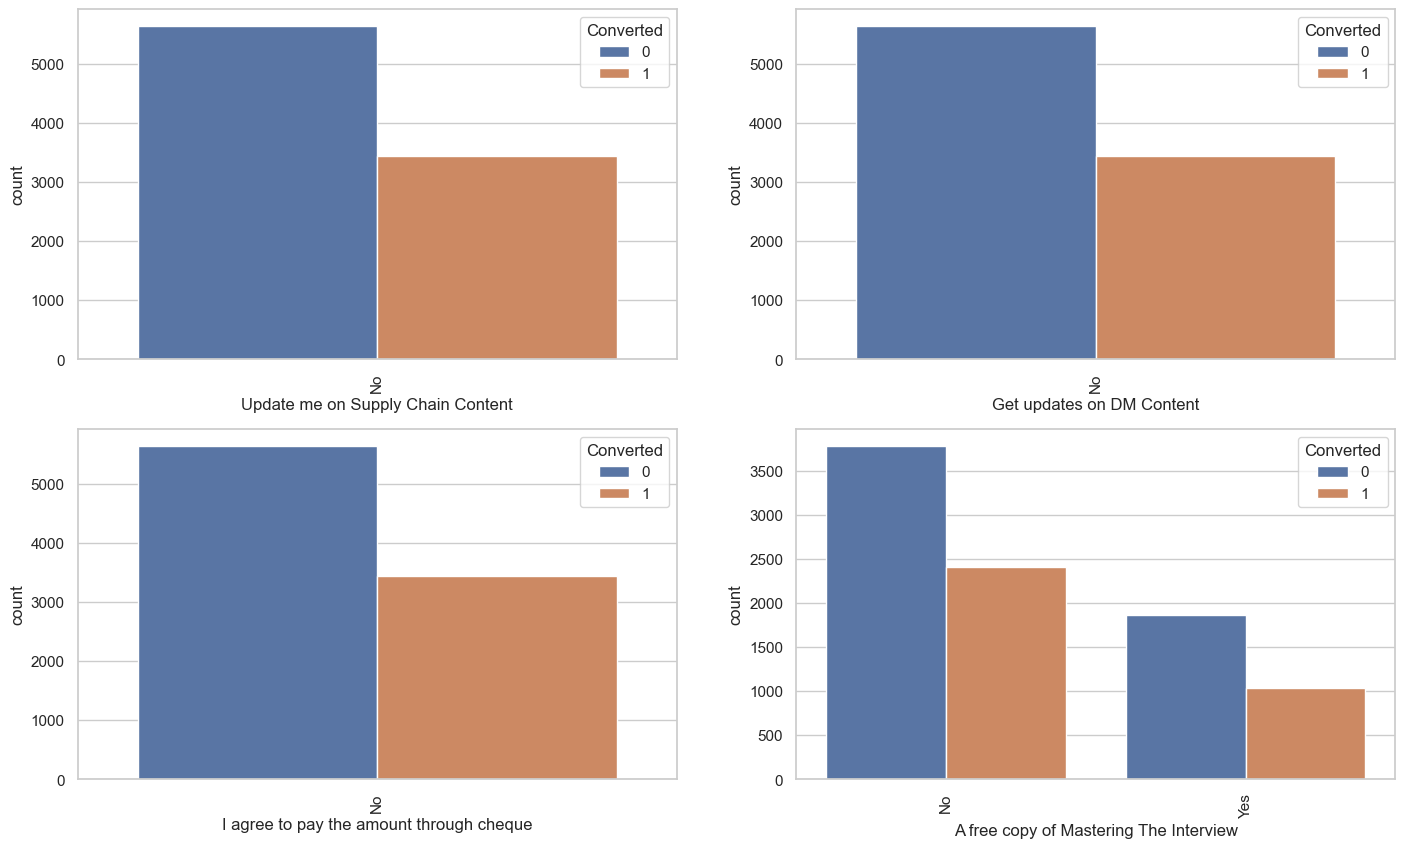

In [199]:
#visualising via countplot with subplot function
plt.figure(figsize=(17,10))
huesubplot("Update me on Supply Chain Content",1)
huesubplot("Get updates on DM Content",2)
huesubplot("I agree to pay the amount through cheque",3)
huesubplot("A free copy of Mastering The Interview",4)

Most entries are "No". Hence, no specific inference can be concluded.

o. Last Notable Activity

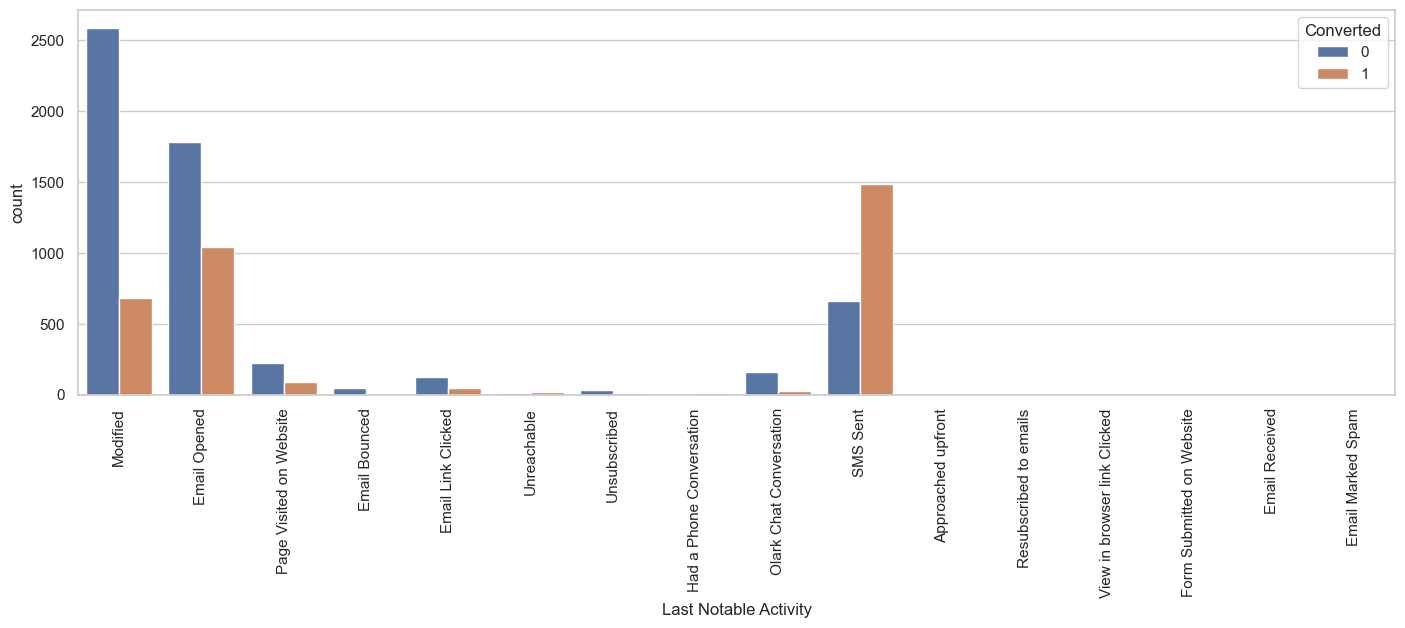

In [200]:
#visualising via countplot
plt.figure(figsize=(17,5))
huecountplot("Last Notable Activity",1)

Results of EDA:
+ It can be seen that there are many columns which are not adding any information to the model, hence dropping them for further analysis.

In [201]:
leads = leads.drop(['Lead Number','Tags','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [202]:
leads.shape


(9074, 13)

In [203]:
leads.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Last Notable Activit

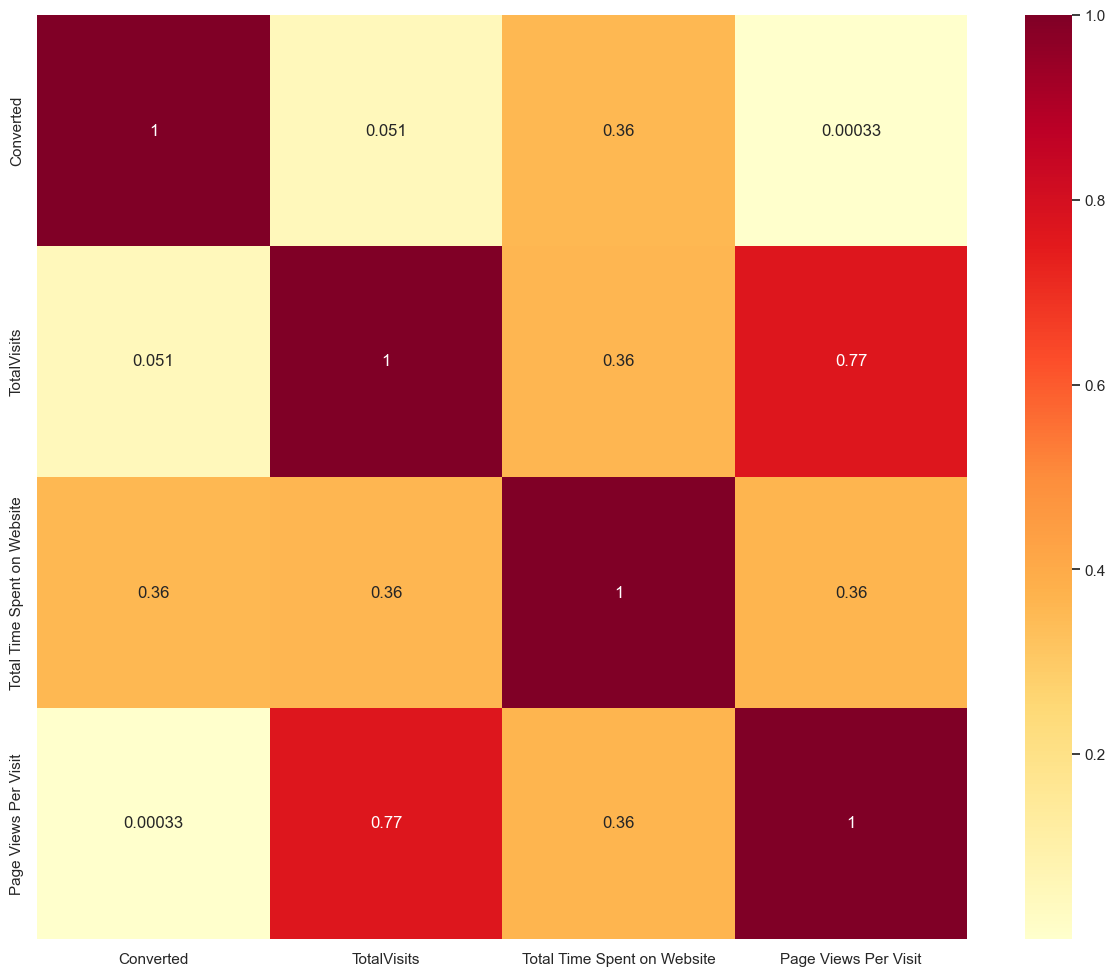

In [204]:
#checking for correlations
plt.figure(figsize = (15,12))
sns.heatmap(leads.corr(),cmap="YlOrRd", annot=True)
plt.show()

#Lets look at colors rather than numbers as there are many variables for correlations. These will be dealt with.

There is no correlation between features.

### Data Preparation

In [205]:
leads.head(5)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Modified


Create binary variables for Yes/No value.

In [206]:
cols =  ['Do Not Email', 'Do Not Call']

def binaryMap(x):
    return x.map({'Yes': 1, "No": 0})

leads[cols] = leads[cols].apply(binaryMap)

#### Create Dummy Variable

To deal with the categorical variables present in the dataset.

In [207]:
#checking for columns with dtype as object inorder to create dummy variables.
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Do Not Call                      9074 non-null   int64  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Last Notable Activit

In [208]:
#create a dummy variable for the categorical variables then dropping the first one.
dummy_leads = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Last Notable Activity']], drop_first=True)
dummy_leads.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [209]:
#concatenate the dummy_leads to the leads dataframe
leads = pd.concat([leads, dummy_leads], axis=1)
#check few rows
leads.head(5)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [210]:
#dropping the columns for which dummies were created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'Last Notable Activity'], axis = 1)

In [211]:
leads.head(5)

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Test-Train Split
The next step is to split the dataset into testing and training datasets.


In [212]:
#import train,test split model
from sklearn.model_selection import train_test_split

#putting feature variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)
X.head(5)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [213]:
#putting target variable "Converted" to y
y = leads['Converted']

y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [214]:
#splitting the data into train & test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling the features

In [215]:
#import scaler model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head(5)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [216]:
#checking the lead conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

As seen 38% lead conversion rate

### Feature Selection Using RFE

In [217]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#create the Logistic Regression model
lr = LogisticRegression()

#initialize RFE with the model and desired number of features
rfe = RFE(estimator=lr, n_features_to_select=20)

#fit RFE to the training data
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [218]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False])

In [219]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 27),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 16),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent', True, 1),
 

In [220]:
#viewing columns selected by RFE
cols_rfe = X_train.columns[rfe.support_]
cols_rfe

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

### Step 2: Model Building

Model-1

In [221]:
#statsmodels
import statsmodels.api as sm

In [222]:
X_train_sm = sm.add_constant(X_train[cols_rfe])
lrsm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = lrsm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Fri, 12 Jan 2024   Deviance:                       5180.6
Time:                        18:30:17   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Other_Activity                             1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_Others                                   -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

Since p-value of 'What is your current occupation_Housewife' is very high, so dropping it.



In [223]:
#dropping the column 'What is your current occupation_Housewife'
col1 = cols_rfe.drop('What is your current occupation_Housewife')

Model - 2

In [224]:
X_train_sm = sm.add_constant(X_train[col1])
lrsm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrsm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Fri, 12 Jan 2024   Deviance:                       5184.5
Time:                        18:30:17   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Other_Activity                             1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_Others                                   -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

Since p-value of 'Last Notable Activity_Had a Phone Conversation' is very high, so dropping it.

In [225]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

Model - 3

In [226]:
X_train_sm = sm.add_constant(X_train[col1])
lrsm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrsm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Fri, 12 Jan 2024   Deviance:                       5186.1
Time:                        18:30:17   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3199      0.590      2.235      0.025       0.163       2.477
Do Not Email                                            -1.6826      0.191     -8.816      0.000      -2.057      -1.308
Total Time Spent on Website                              1.1059      0.041     27.170      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1158      0.129     -8.626      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6034      0.915      1.753      0.080      -0.190       3.396
Lead Origin_Lead Import                                  0.9065      0.480      1.890      0.059      -0.034       1.847
Lead Source_Olark Chat                                   1.1230      0.124      9.064      0.000       0.880       1.366
Lead Source_Reference                                    1.7724      0.938      1.889      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2977      1.165      3.688      0.000       2.013       6.582
Last Activity_Olark Chat Conversation                   -0.9462      0.172     -5.503      0.000      -1.283      -0.609
Last Activity_Other_Activity                             2.2308      0.463      4.820      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.3440      0.076     17.751      0.000       1.196       1.492
Last Activity_Unsubscribed                               1.4134      0.483      2.928      0.003       0.467       2.360
Specialization_Others                                   -1.1413      0.126     -9.063      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0390      0.627     -1.656      0.098      -2.269       0.191
What is your current occupation_Unemployed              -1.4916      0.585     -2.549      0.011      -2.639      -0.345
What is your current occupation_Working Professional     1.1383      0.614      1.855      0.064      -0.064       2.341
Last Notable Activity_Modified                          -0.8767      0.082    -10.750      0.000      -1.037      -0.717
Last Notable Activity_Unreachable                        1.5719      0.476      3.299      0.001       0.638       2.506
========================================================================================================================
"""

Since p-value of 'What is your current occupation_Student' is very high, so dropping it.

In [227]:
col1 = col1.drop('What is your current occupation_Student')

Model - 4

In [228]:
X_train_sm = sm.add_constant(X_train[col1])
lrsm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrsm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Fri, 12 Jan 2024   Deviance:                       5189.0
Time:                        18:30:18   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Other_Activity                             2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Others                                   -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

Since p-value of 'Lead Origin_Lead Add Formt' is very high, so dropping it.

In [229]:
col1 = col1.drop('Lead Origin_Lead Add Form')

Model-5

In [230]:
X_train_sm = sm.add_constant(X_train[col1])
lrsm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrsm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Fri, 12 Jan 2024   Deviance:                       5192.3
Time:                        18:30:18   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4578      0.240      1.907      0.056      -0.013       0.928
Do Not Email                                            -1.6806      0.191     -8.816      0.000      -2.054      -1.307
Total Time Spent on Website                              1.1047      0.041     27.190      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1473      0.129     -8.907      0.000      -1.400      -0.895
Lead Origin_Lead Import                                  0.8826      0.480      1.838      0.066      -0.059       1.824
Lead Source_Olark Chat                                   1.1108      0.124      8.993      0.000       0.869       1.353
Lead Source_Reference                                    3.3614      0.243     13.840      0.000       2.885       3.837
Lead Source_Welingak Website                             5.8902      0.730      8.073      0.000       4.460       7.320
Last Activity_Olark Chat Conversation                   -0.9522      0.172     -5.544      0.000      -1.289      -0.616
Last Activity_Other_Activity                             2.2254      0.463      4.808      0.000       1.318       3.133
Last Activity_SMS Sent                                   1.3427      0.076     17.732      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.916      0.004       0.462       2.354
Specialization_Others                                   -1.1652      0.126     -9.273      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.5974      0.213     -2.804      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0280      0.283      7.158      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8745      0.081    -10.736      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5728      0.475      3.308      0.001       0.641       2.505
========================================================================================================================
"""

Checking VIF Values:

In [231]:
#import vif from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

#create a VIF dataframe which contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.72
2,Lead Origin_Landing Page Submission,5.74
11,Specialization_Others,3.99
4,Lead Source_Olark Chat,2.24
14,Last Notable Activity_Modified,1.86
13,What is your current occupation_Working Profes...,1.66
9,Last Activity_SMS Sent,1.63
7,Last Activity_Olark Chat Conversation,1.59
5,Lead Source_Reference,1.46
1,Total Time Spent on Website,1.32


In [232]:
#dropping the column  'What is your current occupation_Unemployed' as it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

Model - 6

In [233]:
X_train_sm = sm.add_constant(X_train[col1])
lrsm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrsm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Fri, 12 Jan 2024   Deviance:                       5200.0
Time:                        18:30:18   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1106      0.127     -0.868      0.385      -0.361       0.139
Do Not Email                                            -1.6767      0.191     -8.786      0.000      -2.051      -1.303
Total Time Spent on Website                              1.1047      0.041     27.207      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1519      0.129     -8.935      0.000      -1.405      -0.899
Lead Origin_Lead Import                                  0.8640      0.480      1.799      0.072      -0.077       1.805
Lead Source_Olark Chat                                   1.1164      0.124      9.037      0.000       0.874       1.359
Lead Source_Reference                                    3.3731      0.243     13.906      0.000       2.898       3.848
Lead Source_Welingak Website                             5.8819      0.730      8.063      0.000       4.452       7.312
Last Activity_Olark Chat Conversation                   -0.9437      0.172     -5.502      0.000      -1.280      -0.608
Last Activity_Other_Activity                             2.2075      0.463      4.767      0.000       1.300       3.115
Last Activity_SMS Sent                                   1.3276      0.075     17.609      0.000       1.180       1.475
Last Activity_Unsubscribed                               1.3822      0.483      2.863      0.004       0.436       2.328
Specialization_Others                                   -1.1774      0.126     -9.356      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.6063      0.195     13.382      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8814      0.081    -10.826      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5571      0.474      3.284      0.001       0.628       2.486
========================================================================================================================
"""

In [234]:
#since the column 'Lead Origin_Lead Import' has high p-value so dropping it
col1 = col1.drop('Lead Origin_Lead Import')

Model - 7

In [235]:
X_train_sm = sm.add_constant(X_train[col1])
lrsm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrsm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Fri, 12 Jan 2024   Deviance:                       5203.0
Time:                        18:30:18   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

Checking final VIF values:

In [236]:
#again as done previously checking vif value
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


Since the p-value is 0 and VIF value is low for all the variables, let's take Model - 7 as our final model. There are 14 variables.

### Step 3: Model Evaluation on Train set

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [237]:
#using 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.192492
1012    0.107074
9226    0.329484
4750    0.866550
7987    0.802188
1281    0.745221
2880    0.097496
4971    0.965877
7536    0.851963
1248    0.772910
dtype: float64

In [238]:
#reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19249248, 0.10707422, 0.32948401, 0.86654975, 0.80218826,
       0.74522141, 0.09749634, 0.96587701, 0.85196293, 0.77291036])

Let's create a dataframe with actual conversion flag along with predicted probabilities.

In [239]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.192492,3009
1,0,0.107074,1012
2,0,0.329484,9226
3,1,0.866550,4750
4,1,0.802188,7987


Let's choose an arbitrary cut-off probability point of 0.5 to find the predicted labels.
So, created new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [240]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.192492,3009,0
1,0,0.107074,1012,0
2,0,0.329484,9226,0
3,1,0.866550,4750,1
4,1,0.802188,7987,1


Now, we have the probabilities and conversion predictions have also been made, let's evaluate the model.

Creating Confusion matrix

In [241]:
#import the 'metrics' library from sklearn for evaluation
from sklearn import metrics

#Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3459  446]
 [ 710 1736]]


In [242]:
# The above Confusion matrix can be read as:
#                   not_converted    converted      
# 
# not_converted        3461      444
# converted            719       1727  

In [243]:
#checking the overall accuracy
print('Accuracy:',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy: 0.8179814202487797


In [244]:
TP = confusion[1,1] #True positive 
TN = confusion[0,0] #True negatives
FP = confusion[0,1] #False positives
FN = confusion[1,0] #False negatives

In [245]:
#calculating the 'sensitivity'
print("Sensitivity: ",TP / float(TP+FN))

Sensitivity:  0.7097301717089125


In [246]:
#calculating the 'specificity'
print("Specificity: ",TN / float(TN+FP))

Specificity:  0.885787451984635


In [247]:
#calculate false postive rate which means
#prediction of converted leads when the leads actually was not converted
print("False Positive Rate:",FP/ float(TN+FP))

False Positive Rate: 0.11421254801536491


+ Specificity = 88% is good, Sensitivity = 70% because of the cut-off point 0.5 that we chose arbitrarily.
+ In order to get good results, we need to optimise the threshold.
+ So first let's plot an ROC curve to see what AUC we get.

#### Plotting the ROC Curve

In [248]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate/ [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [249]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

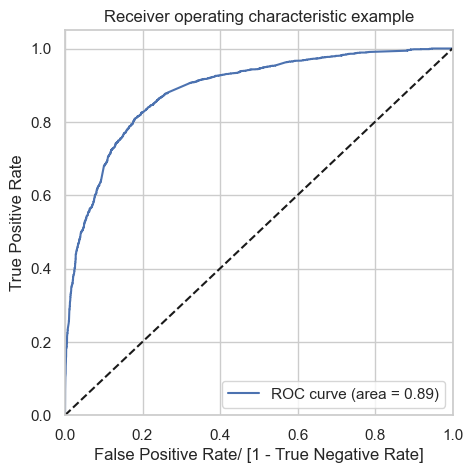

In [250]:
#ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve of the ROC is 0.89 so we have a good model. 
#### Finding Optimal Cut-off point
Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [251]:
#creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0


In [252]:
#Calculate accuracy, sensitivity and specificity for various probability cut-offs
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] #True positive 
# TN = confusion[0,0] #True negatives
# FP = confusion[0,1] #False positives
# FN = confusion[1,0] #False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.591718  0.972200  0.353393
0.2   0.2  0.749488  0.915781  0.645327
0.3   0.3  0.800976  0.851594  0.769270
0.4   0.4  0.816249  0.775961  0.841485
0.5   0.5  0.817981  0.709730  0.885787
0.6   0.6  0.798614  0.602617  0.921383
0.7   0.7  0.786963  0.529027  0.948528
0.8   0.8  0.762557  0.427228  0.972599
0.9   0.9  0.722248  0.298446  0.987708


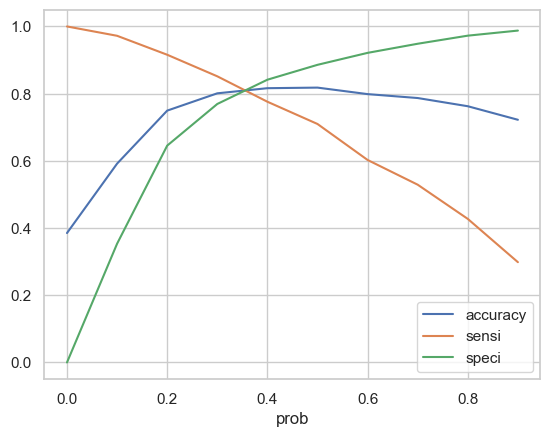

In [253]:
# On plotting we see:
cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above curve, 0.35 seems to be the optimum point so taking it as cut-off probability/threshold.

In [254]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [255]:
#Trained data is assigned to Lead_Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0,0,33
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0,1,80


Repeating evaluation steps.

In [256]:
#accuracy
print("Accuracy:",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy: 0.8132577546843017


In [257]:
#2nd Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3173,  732],
       [ 454, 1992]])

In [258]:
TP = confusion2[1,1] #True positive 
TN = confusion2[0,0] #True negatives
FP = confusion2[0,1] #False positives
FN = confusion2[1,0] #False negatives

In [259]:
#calculating the 'sensitivity'
print("Sensitivity: ",TP / float(TP+FN))

Sensitivity:  0.8143908421913328


In [260]:
#calculating the 'specificity'
print("Specificity: ",TN / float(TN+FP))

Specificity:  0.8125480153649167


In [261]:
#calculate false postive rate which means
#prediction of converted leads when the leads actually was not converted
print("False Positive Rate:",FP/ float(TN+FP))

False Positive Rate: 0.18745198463508322


Current cut-off point is good.

Also, calculating precision and recall.

In [262]:
# Precision
#TP / TP + FP

print("Precision: ",confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))

# Recall
#TP / TP + FN

print("Recall: ",confusion[1,1]/(confusion2[1,0]+confusion2[1,1]))

Precision:  0.7312775330396476
Recall:  0.7097301717089125


Precision and recall tradeoff

In [263]:
#import precision and recall curve model
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [264]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

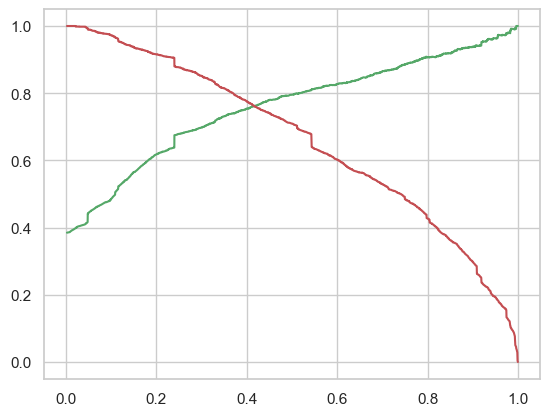

In [265]:
#plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 4: Making Predictions on the Test Set

In [266]:
#scaling and using 'transform' on the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [267]:
#selecting X_train and X_test as well
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,1,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0,0


In [268]:
#adding a constant
X_test_sm = sm.add_constant(X_test)

#making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.126835
1490    0.968324
7936    0.109448
4216    0.803988
3830    0.129754
1800    0.628554
6507    0.343306
4821    0.297353
4223    0.918319
4714    0.329484
dtype: float64

In [269]:
#converting y_test_pred to a dataframe which is an array
y_pred1 = pd.DataFrame(y_test_pred)

In [270]:
y_pred1.head(5)

,0
3271,0.126835
1490,0.968324
7936,0.109448
4216,0.803988
3830,0.129754


In [271]:
#converting y_test to dataframe
y_test1 = pd.DataFrame(y_test)

In [272]:
#putting ID to index
y_test1['Prospect ID'] = y_test1.index

In [273]:
#remove index for both dataframes to append them side by side 
y_pred1.reset_index(drop=True, inplace=True)
y_test1.reset_index(drop=True, inplace=True)

In [274]:
#appending y_test1 and y_pred1
y_pred_final = pd.concat([y_test1, y_pred1],axis=1)

In [275]:
y_pred_final.head(5)

,Converted,Prospect ID,0
0,0,3271,0.126835
1,1,1490,0.968324
2,0,7936,0.109448
3,1,4216,0.803988
4,0,3830,0.129754


In [276]:
#renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [277]:
#rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_Prob'])

In [278]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.126835
1,1490,1,0.968324
2,7936,0,0.109448
3,4216,1,0.803988
4,3830,0,0.129754


In [279]:
y_pred_final['Final_Prediction'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [280]:
#calculating the overall accuracy.
print("Accuracy: ",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Prediction))

Accuracy:  0.8071979434447301


In [281]:
#Creating the confusion matrix for the test set
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Prediction )
confusion3

array([[1408,  326],
       [ 199,  790]])

In [282]:
TP = confusion3[1,1] #True positive 
TN = confusion3[0,0] #True negatives
FP = confusion3[0,1] #False positives
FN = confusion3[1,0] #False negatives

In [283]:
# Sensitivity of the logistic regression model
print("Sensitivity:",TP / float(TP+FN))

Sensitivity: 0.7987866531850354


In [284]:
#Specificity
print("Specificity:",TN / float(TN+FP))

Specificity: 0.81199538638985


Assigning Lead Score to the Testing data

In [285]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Prediction,Lead_Score
0,3271,0,0.126835,0,13
1,1490,1,0.968324,1,97
2,7936,0,0.109448,0,11
3,4216,1,0.803988,1,80
4,3830,0,0.129754,0,13


Observations:
After running the model on the Test Data, we obtain:

+ Accuracy : 80.7%
+ Sensitivity : 79.8%
+ Specificity : 81.1%

#### Results :
a. Comparing the values obtained for Train & Test model:

Train Data:
+ Accuracy : 81.3 %
+ Sensitivity : 81.4 %
+ Specificity : 81.2 %

Test Data:
+ Accuracy : 80.7 %
+ Sensitivity : 79.8 %
+ Specificity : 81.1 %

Thus, we have achieved our goal of getting the target lead conversion rate to be around 80%. The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher leads conversion rate of 80%.

b.  Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [286]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_Prob,Final_Prediction,Lead_Score
1,1490,1,0.968324,1,97
8,4223,1,0.918319,1,92
16,1946,1,0.924928,1,92
21,2461,1,0.992885,1,99
23,5822,1,0.998023,1,100
...,...,...,...,...,...
2694,1566,1,0.946456,1,95
2699,6461,1,0.961588,1,96
2703,5741,1,0.909023,1,91
2715,6299,1,0.872498,1,87


There are 369 leads who can be contacted and have a high chance of getting converted. The Prospect ID of the customers are:

In [287]:
#hot leads finalise
print("The Prospect ID of the customers who should be contacted are:")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers who should be contacted are:


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947, 4807,
        446,  789, 8372, 5805, 3758, 1561, 5367,  737, 6423, 8286, 7174,
       4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490,
       1995, 4498, 5797, 8687,  831, 7653, 2018, 6743, 3976, 5769, 1051,
       1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481,  785,
       3265, 3285, 7433, 3858, 3810, 2009, 8106,  373, 7417, 4179, 8568,
       7268, 6784, 6754, 7236, 2960, 7753, 3983,  802, 8745, 4717,  505,
       8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 7175, 1675,
       6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793, 4837, 2495,
        822, 8111, 2378, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489,
       2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,  174,
       2674, 8065, 2095, 1568, 8597, 4865, 3535, 4708, 1304, 6066, 6538,
       5700, 1388, 5815, 7970, 7902, 5804, 7805, 50

c. Finding out the Important Features from our final model:

In [288]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.858769
Lead Source_Reference                                   3.340121
What is your current occupation_Working Professional    2.606375
Last Activity_Other_Activity                            2.198777
Last Notable Activity_Unreachable                       1.546980
Last Activity_Unsubscribed                              1.378366
Last Activity_SMS Sent                                  1.325023
Total Time Spent on Website                             1.097643
Lead Source_Olark Chat                                  1.091475
const                                                  -0.071692
Last Notable Activity_Modified                         -0.881599
Last Activity_Olark Chat Conversation                  -0.948539
Lead Origin_Landing Page Submission                    -1.186301
Specialization_Others                                  -1.198306
Do Not Email                                           -1.678278
dtype: float64